<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_003_wine/_002_wine_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine binary classifier



# 필수 단축키

- Ctrl + Enter: 현재 셀 실행

- Shift + Enter: 현재 셀 실행 후 다음 셀로 이동

- Alt + Enter: 현재 셀 실행 후 아래 셀 생성 + 이동

- Ctrl + F9 : 전체 셀 실행



In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

# history = model.fit()
def plot_graphs(history, string):  # 그래프로 만들 함수
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

In [ ]:
columns = ['주석산 농도', '아세트산 농도', '구연산 농도', '잔류 당분 농도', 
           '염화나트륨 농도', '유리 아황산 농도', '총 아황산 농도', '밀도', 
           'pH', '황산칼륨 농도', '알코올 도수', '와인의 맛(0~10등급)', 
           'class(1:red, 0:white)']

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/wiv33/A-Learning-python/master/machine-learning/_000_hello_machine/_003_study_essential/_003_wine/data/wine.csv", 
    header=None)

# 0 번째 row에 실제 값
df.columns = columns
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1])

# Exploratory data

- 데이터 모양
- 데이터 내용

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

# build model


In [ ]:
type(12)

int

In [ ]:
def add_seq(list_layer):
  # print(args)
  model = models.Sequential(list_layer)
  return model

In [ ]:
model = add_seq([
                 layers.Input(shape=(12, )), 
                 layers.Dense(64), layers.Activation('relu')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = models.Sequential()
model.add(layer=layers.Input(shape=(12, )))
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))

model.add(layers.Dense(32))
model.add(layers.Activation('relu'))

model.add(layers.Dense(8))
model.add(layers.Activation('relu'))

model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
# outputs 변수에 마지막 dense 값이 업데이트 된다.
print(model.outputs)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

print('='* 100)
model.summary()

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_4')>]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
_______________________________________

### history 

In [ ]:
# 1. 0 ~ 100
# 2. 100 ~ 200
# 3. 200 ~ 300
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=100,
                    validation_data=(x_test, y_test))

Epoch 1/100
77/77 [==============================] - 1s 8ms/step - loss: 0.7228 - accuracy: 0.7657 - val_loss: 0.2076 - val_accuracy: 0.9298
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9320 - val_loss: 0.1994 - val_accuracy: 0.9323
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9307 - val_loss: 0.1942 - val_accuracy: 0.9366
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9414 - val_loss: 0.1956 - val_accuracy: 0.9298
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9389 - val_loss: 0.1781 - val_accuracy: 0.9415
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9463 - val_loss: 0.1704 - val_accuracy: 0.9440
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9433 - val_loss: 0.1539 - val_accuracy: 0.9428
Epoch 8/100
7

# visualize accuracy and loss

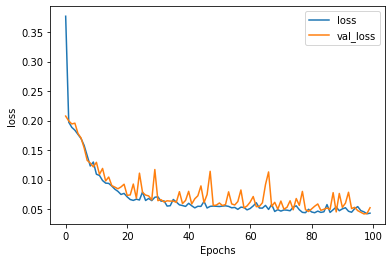

In [ ]:
plot_graphs(history, 'loss')

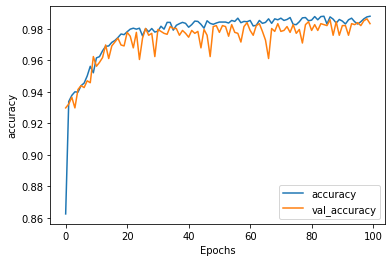

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
pred = model.predict(x_test)

In [ ]:
check_shape = model.predict(x_test)

In [ ]:
check_shape.shape

(1625, 1)

In [ ]:
pred.astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
pred = pred.astype(int)

In [ ]:
pred.reshape(-1, ).tolist()[3]

0

In [ ]:
type(y_test.tolist())

list

In [ ]:
y_test.tolist()[3] == pred[3]

array([ True])

In [ ]:
y_test.tolist()[7] == pred[7]

array([ True])

In [ ]:
def compare_predict(num):
  print(y_test.tolist()[num] == pred[num])

In [ ]:
compare_predict(13), compare_predict(17)

[False]
[ True]


(None, None)

## 함수 생성하기

In [ ]:
for x in range(len(y_test)):
  compare_predict(x)

[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[False]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [ ]:
y_test.tolist()[7]

0